Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import plotly.express as px
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

Read CSV

In [ ]:
africa_0 = pd.read_csv('/content/drive/My Drive/TrashOut Private/Africa/2020-06-23_0.csv', error_bad_lines=False, delimiter=';')
africa_1 = pd.read_csv('/content/drive/My Drive/TrashOut Private/Africa/2020-06-23_1.csv', error_bad_lines=False, delimiter=';')

Concatenate the dataframes into a single one

In [ ]:
africa = pd.concat([africa_0, africa_1]).reset_index(drop=True)

In [ ]:
africa.head()

,id,latitude,longitude,continent,country,aa1,aa2,aa3,locality,subLocality,types,updateTime,updateNeeded,note,url,status,size,anonymous,created,accessibility,image
0,57838,-26.198062,28.051973,Africa,South Africa,Gauteng,City of Johannesburg Metropolitan Municipality,NaN,Johannesburg,Hillbrow,"deadAnimals,liquid,metal,organic,plastic,domestic",2020-06-23T10:10:44.056Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,car,False,2020-06-23T10:10:44.056Z,NaN,https://firebasestorage.googleapis.com/v0/b/tr...
1,57837,-26.196481,28.050331,Africa,South Africa,Gauteng,City of Johannesburg Metropolitan Municipality,NaN,Johannesburg,Hillbrow,"liquid,metal,plastic,construction,domestic",2020-06-23T10:04:35.937Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,car,False,2020-06-23T10:04:35.937Z,NaN,https://firebasestorage.googleapis.com/v0/b/tr...
2,57836,-26.182135,27.989881,Africa,South Africa,Gauteng,City of Johannesburg Metropolitan Municipality,NaN,Johannesburg,Westdene,"glass,liquid,metal,organic,plastic,domestic",2020-06-23T09:46:03.305Z,False,"The location is in Ashanti Street, Coronationv...",https://admin.trashout.ngo/trash-management/de...,stillHere,car,True,2020-06-23T09:46:03.305Z,byCar,https://firebasestorage.googleapis.com/v0/b/tr...
3,57831,-28.466159,28.855491,Africa,South Africa,Free State,Thabo Mofutsanyane,NaN,Phuthaditjhaba,Phuthaditjhaba,"glass,deadAnimals,dangerous,metal,organic,plas...",2020-06-22T14:42:45.226Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,car,True,2020-06-22T14:42:45.226Z,byCar,https://firebasestorage.googleapis.com/v0/b/tr...
4,57830,-28.514575,28.820170,Africa,South Africa,Free State,Thabo Mofutsanyane,NaN,Phuthaditjhaba,Phuthaditjhaba-A,"glass,dangerous,metal,organic,plastic,construc...",2020-06-22T13:08:51.901Z,False,NaN,https://admin.trashout.ngo/trash-management/de...,stillHere,car,False,2020-06-22T13:08:51.901Z,notForGeneralCleanup,https://firebasestorage.googleapis.com/v0/b/tr...


Check for null values

In [ ]:
pd.DataFrame(africa.isnull().sum()*100/len(africa), columns=['% Missing Values']).sort_values(by='% Missing Values', ascending=False)

,% Missing Values
aa3,98.985725
note,89.519159
aa2,34.391435
accessibility,22.990233
locality,22.032307
subLocality,7.325319
aa1,0.901578
image,0.169046
created,0.000000
anonymous,0.000000


Check data types

In [ ]:
africa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5324 entries, 0 to 5323
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5324 non-null   int64  
 1   latitude       5324 non-null   float64
 2   longitude      5324 non-null   float64
 3   continent      5324 non-null   object 
 4   country        5324 non-null   object 
 5   aa1            5276 non-null   object 
 6   aa2            3493 non-null   object 
 7   aa3            54 non-null     object 
 8   locality       4151 non-null   object 
 9   subLocality    4934 non-null   object 
 10  types          5324 non-null   object 
 11  updateTime     5324 non-null   object 
 12  updateNeeded   5324 non-null   bool   
 13  note           558 non-null    object 
 14  url            5324 non-null   object 
 15  status         5324 non-null   object 
 16  size           5324 non-null   object 
 17  anonymous      5324 non-null   bool   
 18  created 

### Country

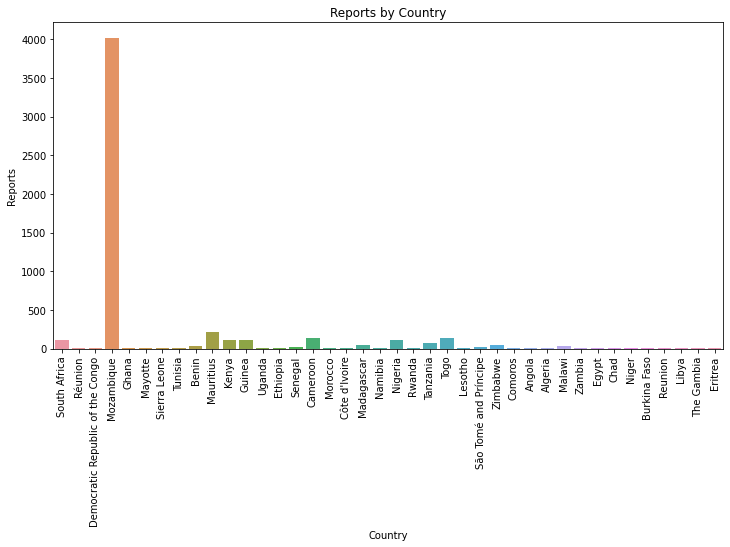

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="country", data=africa)
plt.title("Reports by Country")
plt.xlabel("Country")
plt.ylabel("Reports")
plt.xticks(rotation=90)
plt.show()

### Plot Heatmap

In [ ]:
avg_latitude = africa['latitude'].mean()
avg_longitude = africa['longitude'].mean()

In [ ]:
coordinates = list(zip(africa['latitude'], africa['longitude']))

In [ ]:
africa_map = folium.Map(location=[avg_latitude, avg_longitude], zoom_start = 4)

In [ ]:
HeatMap(coordinates).add_to(folium.FeatureGroup(name='Heat Map').add_to(africa_map))
folium.LayerControl().add_to(africa_map)

In [ ]:
africa_map

###Cluster Locations

DBSCAN directly supports harvesine distance metric, only issue is that sklearn's implementation of harvesine distance expects radians, not degrees. Also, the eps argument for DBSCAN refers to the radius of the neighborhood, but also needs to be in radians. The conversion factor for miles to radians is approx. 1/3958.748

In [ ]:
africa["latitude_radians"] = np.radians(africa["latitude"])
africa["longitude_radians"] = np.radians(africa["longitude"])

In [ ]:
clusters = DBSCAN(eps = 100/3958.748)
clusters.fit(africa[['latitude_radians', 'longitude_radians']])
africa['cluster'] = clusters.labels_

In [ ]:
px.scatter_geo(data_frame=africa, lat="latitude", lon="longitude", color="cluster", scope="africa")